# SOCCER DATABASE ANALYSIS USING SQL, PANDAS and NUMPY
>
## This dataset was obtained from kaggle.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis on the Player Dataset</a></li>
<li><a href="#eda1">Exploratory Data Analysis on the Match Dataset</a></li>  
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction

> The soccer database obtained from Kaggle will be analyzed. The database constitute of seven different table of which are linked in one way or the other. For this analysis, the six of the seven tables were filtered and merged using SQL to form two new datasets which was used in the exploratory data analysis.The Data wrangling process explores this process further.


In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

<a id='wrangling'></a>
## Data Wrangling

In [2]:
#connecting to the location of the sqlite database
conn = sqlite3.connect("C:\\Users\\HP\\Downloads\\database.sqlite")
conn

> The connection to the database was successful

In [3]:
#code to view all the tables contained in the relational database using pandas
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)

tables # returns the result

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


> There are 7 tables altogether

#### We will now proceed to view these tables

In [4]:
# team attributes table data
# using pandas and SQL to extract the data
team_attributes = pd.read_sql("""SELECT *
                        FROM Team_Attributes;""", conn)

team_attributes.head(5) # returns the first five rows of the table

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [5]:
#team table data
team = pd.read_sql("""SELECT *
                        FROM Team;""", conn)
team.head(5) # returns the first five rows of the table

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [6]:
#league table data
league = pd.read_sql("""SELECT *
                        FROM League;""", conn)
league.head(5) # retunrns the first 5 rows of the table

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [7]:
#match table data
match = pd.read_sql("""SELECT *
                        FROM Match;""", conn)
match.head(5) #returns the first 5 rows of the table

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [8]:
#countries table data
countries = pd.read_sql("""SELECT *
                        FROM Country;""", conn)
countries.sample(5) # returns any 5 random rows of the table

,id,name
10,24558,Switzerland
1,1729,England
2,4769,France
6,15722,Poland
0,1,Belgium


In [9]:
#player attributes data
player_attributes = pd.read_sql("""SELECT *
                        FROM Player_Attributes;""", conn)
player_attributes.sample(5) #returns any random 5 rows of the table

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
21031,21032,208165,260964,2013-03-08 00:00:00,52.0,66.0,right,low,medium,27.0,...,26.0,36.0,47.0,60.0,44.0,9.0,5.0,12.0,9.0,9.0
100690,100691,206635,181793,2013-09-20 00:00:00,64.0,69.0,right,high,medium,53.0,...,72.0,59.0,49.0,47.0,39.0,7.0,11.0,6.0,7.0,13.0
95787,95788,210625,350472,2016-02-04 00:00:00,54.0,67.0,right,medium,medium,28.0,...,30.0,35.0,58.0,66.0,60.0,8.0,7.0,7.0,14.0,14.0
82420,82421,224309,574662,2007-02-22 00:00:00,57.0,71.0,right,medium,medium,42.0,...,60.0,49.0,38.0,56.0,49.0,12.0,11.0,12.0,11.0,8.0
110917,110918,176211,69229,2016-04-21 00:00:00,71.0,71.0,right,medium,low,36.0,...,63.0,82.0,21.0,19.0,24.0,15.0,7.0,7.0,15.0,7.0


In [10]:
#player data
player = pd.read_sql("""SELECT *
                        FROM player;""", conn)
player.sample(5) # returns any random 5 rows of the table

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
7887,7899,42601,Nico Pulzetti,157801,1984-02-13 00:00:00,175.26,154
6626,6636,206508,Marcelo Brozovic,216352,1992-11-16 00:00:00,180.34,150
9723,9739,24224,Shay Given,2651,1976-04-20 00:00:00,185.42,185
2279,2282,304855,Darko Jevtic,208160,1993-02-08 00:00:00,182.88,163
1151,1154,178284,Bavon Tshibuabua,193518,1991-07-17 00:00:00,177.80,157


### USING SQL TO EXTRACT  RELEVANT  FEATURES FROM THE DATA BASE AND CURATE  DATASETS FOR ANALYSIS

##### 1. PLAYERS DATASET
 To create this dataset, some features from the player table and the player attributes table were selected using the SELECT syntax of SQL and then merged together using the JOIN syntax to create a dataset containing certain information about the players.

In [11]:
# PLAYERS DATASET
players = pd.read_sql("""SELECT Player_Attributes.id, 
                Player.player_name AS player_name, 
                Player.birthday AS birthday, 
                Player.height AS height, 
                Player.weight AS weight,
                overall_rating,
                potential,
                preferred_foot,
                ball_control,
                free_kick_accuracy,
                agility,
                strength,
                aggression,
                penalties
                FROM Player_Attributes
                JOIN Player on Player.player_api_id = Player_Attributes.player_api_id; """, conn)

players.sample(5) # returns 5 random rows of the newly created player dataset 

,id,player_name,birthday,height,weight,overall_rating,potential,preferred_foot,ball_control,free_kick_accuracy,agility,strength,aggression,penalties
154436,154437,Ruben Pardo,1992-10-22 00:00:00,182.88,150,70.0,81.0,right,74.0,68.0,79.0,40.0,58.0,60.0
92611,92612,Kader Mangane,1983-03-23 00:00:00,193.04,198,64.0,74.0,right,53.0,54.0,66.0,65.0,63.0,51.0
30598,30599,Ciaran Clark,1989-09-26 00:00:00,187.96,168,71.0,77.0,right,58.0,35.0,49.0,71.0,72.0,38.0
3913,3914,Aislan,1988-01-11 00:00:00,193.04,198,67.0,72.0,right,61.0,45.0,66.0,78.0,68.0,52.0
37614,37615,Danny Simpson,1987-01-04 00:00:00,177.80,170,70.0,75.0,right,61.0,31.0,60.0,66.0,72.0,54.0


##### 2. MATCH DATASET
To create this dataset,some features were selected from the country table, league table, team table and match table using the SELECT syntax of SQL and merged together using the join SYNTAX of SQL. 

In [12]:
#MATCH DATASET
matches = pd.read_sql("""SELECT Match.id, 
                Country.name AS country_name, 
                League.name AS league_name, 
                season,  
                date,
                HT.team_long_name AS  home_team,
                AT.team_long_name AS away_team,
                home_team_goal, 
                away_team_goal
                FROM Match
                JOIN Country on Country.id = Match.country_id
                JOIN League on League.id = Match.league_id
                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id; """, conn)

matches.head(5) # returns 5 random rows of the newly created matches dataset 

,id,country_name,league_name,season,date,home_team,away_team,home_team_goal,away_team_goal
0,1,Belgium,Belgium Jupiler League,2008/2009,2008-08-17 00:00:00,KRC Genk,Beerschot AC,1,1
1,2,Belgium,Belgium Jupiler League,2008/2009,2008-08-16 00:00:00,SV Zulte-Waregem,Sporting Lokeren,0,0
2,3,Belgium,Belgium Jupiler League,2008/2009,2008-08-16 00:00:00,KSV Cercle Brugge,RSC Anderlecht,0,3
3,4,Belgium,Belgium Jupiler League,2008/2009,2008-08-17 00:00:00,KAA Gent,RAEC Mons,5,0
4,5,Belgium,Belgium Jupiler League,2008/2009,2008-08-16 00:00:00,FCV Dender EH,Standard de Liège,1,3


### GENERAL PROPERTIES AND DATA CLEANING ON THE PLAYER DATASET

> To make this dataset a little cleaner, the date-time stamp in the birthday columns was splitted and the birthday year was extracted and kept for further analysis. 
>
>The birthday column was however dropped

In [13]:
#Obtaining the datestamp from the birthday column (recall the birthday column has both date and time stamp)
players['birthday']=pd.to_datetime(players['birthday']).dt.date

#Extracting only the years from the datestamp and converting the data type to categorical for analysis
players['birth_year'] = pd.DatetimeIndex(players['birthday']).year.astype('category')

#dropping the birthday column
players.drop('birthday', inplace =True, axis=1)

#viewing the final result
players.head(5)

,id,player_name,height,weight,overall_rating,potential,preferred_foot,ball_control,free_kick_accuracy,agility,strength,aggression,penalties,birth_year
0,1,Aaron Appindangoye,182.88,187,67.0,71.0,right,49.0,39.0,59.0,76.0,71.0,48.0,1992
1,2,Aaron Appindangoye,182.88,187,67.0,71.0,right,49.0,39.0,59.0,76.0,71.0,48.0,1992
2,3,Aaron Appindangoye,182.88,187,62.0,66.0,right,49.0,39.0,59.0,76.0,63.0,48.0,1992
3,4,Aaron Appindangoye,182.88,187,61.0,65.0,right,48.0,38.0,59.0,76.0,62.0,47.0,1992
4,5,Aaron Appindangoye,182.88,187,61.0,65.0,right,48.0,38.0,59.0,76.0,62.0,47.0,1992


In [14]:
#checking the general information of the dataset
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   id                  183978 non-null  int64   
 1   player_name         183978 non-null  object  
 2   height              183978 non-null  float64 
 3   weight              183978 non-null  int64   
 4   overall_rating      183142 non-null  float64 
 5   potential           183142 non-null  float64 
 6   preferred_foot      183142 non-null  object  
 7   ball_control        183142 non-null  float64 
 8   free_kick_accuracy  183142 non-null  float64 
 9   agility             181265 non-null  float64 
 10  strength            183142 non-null  float64 
 11  aggression          183142 non-null  float64 
 12  penalties           183142 non-null  float64 
 13  birth_year          183978 non-null  category
dtypes: category(1), float64(9), int64(2), object(2)
memory usage: 18.4+ 

> There are 4 different data types in this dataset, a couple of missing values and it occupies a storage space of 18.4MB

In [15]:
#checking for missing values
players.isnull().sum()

id                       0
player_name              0
height                   0
weight                   0
overall_rating         836
potential              836
preferred_foot         836
ball_control           836
free_kick_accuracy     836
agility               2713
strength               836
aggression             836
penalties              836
birth_year               0
dtype: int64

> Missing values are present in some columns. They will not be dropped because the amount missing is little compared to the total amount of dataset. Hence we really won't be missing a whole lot of information.

In [16]:
#checking for duplicated rows
players.duplicated().all()

False

> There are no duplicated rows

In [17]:
#checking the statistical summary of the dataset
players.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,183978,NaN,NaN,NaN,91989.5,53110,1,45995.2,91989.5,137984,183978
player_name,183978,10848,Danilo,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height,183978,NaN,NaN,NaN,181.879,6.39482,157.48,177.8,182.88,185.42,208.28
weight,183978,NaN,NaN,NaN,168.776,15.0889,117,159,168,179,243
overall_rating,183142,NaN,NaN,NaN,68.6,7.04114,33,64,69,73,94
potential,183142,NaN,NaN,NaN,73.4604,6.59227,39,69,74,78,97
preferred_foot,183142,2,right,138409,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ball_control,183142,NaN,NaN,NaN,63.3889,15.1967,5,58,67,73,97
free_kick_accuracy,183142,NaN,NaN,NaN,49.381,17.8317,1,36,50,63,97
agility,181265,NaN,NaN,NaN,65.9709,12.9546,11,58,68,75,96


#### OBSERVATIONS
1. There are missing values in some features of the dataset
2. There are no duplicated rows/observations.
3. There are 10848 recorded unique players with player Danilo occuring the most (108 times) in the dataset.
4. There are 33 unique birth years. 1998 is the most occuring birth year.
5. Players have the right foot as their most preferred foot.
6. The average height and weight of the 10848 players is 182m and 169lb
7. The minimum and maximum strength found in all the players is 10 and 96.
8. The median agression level of a player is 64
9. The maximum penalty made by a player is 96
10. The least agility level of a player is 11

<a id='eda'></a>
## Exploratory Data Analysis on the Player Dataset

#### QUESTIONS TO BE ANSWERED WITH THE DATASET

> **QUESTION 1. Which players had the most penalties?**

In [18]:
# 1. grouping the dataset according to the various player names
# 2. After grouping, the penalties column was extracted and the sum function applied
# 3. Finally the subseted data was arranged in ascending order with the player with the most penalties at the top
# 4. The top 20 players with the most penalties is displayed below
top_players = players.groupby('player_name')['penalties'].sum().sort_values(ascending=False).head(20)
top_players

player_name
Danilo                6358.0
Alex                  6140.0
Fernando              4764.0
Douglas               4687.0
Josue                 4671.0
Rafinha               4633.0
Alessio Cerci         4314.0
Carlos Eduardo        4306.0
Maicon                4263.0
Diego                 4259.0
Mario Balotelli       4120.0
Kaka                  4093.0
Claudio Marchisio     3984.0
Paulinho              3977.0
Felipe                3974.0
David Lopez           3900.0
Michael Bradley       3813.0
Zdravko Kuzmanovic    3799.0
Andrea Pirlo          3791.0
Scott Brown           3779.0
Name: penalties, dtype: float64

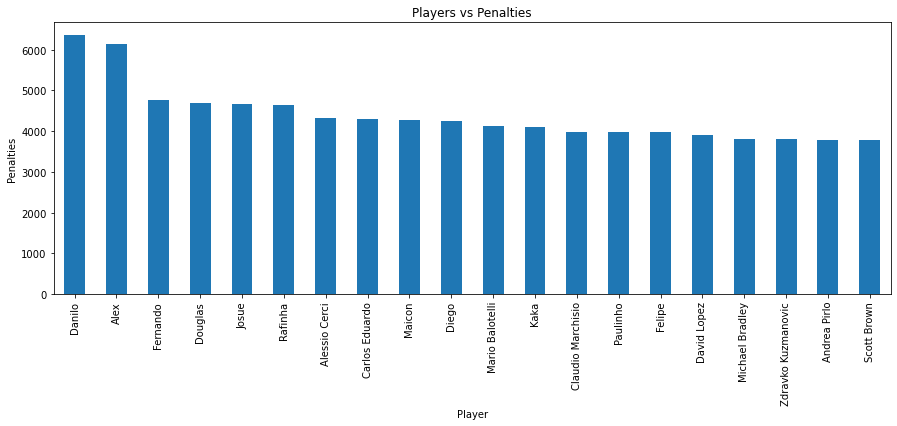

In [19]:
plt.figure(figsize =(15,5)) #setting plot size
top_players.plot(kind='bar') #making the plot
plt.title('Players vs Penalties') #setting plot title
plt.xlabel('Player') # setting a label name for x-axis
plt.ylabel('Penalties'); #setting a label name for y-axis

##### INSIGHT
- Player Danilo had the highest number of penalties. A total of 6358 penalties.
- Second in rank is Alex, followed by Fernando.

> **QUESTION 2. Checking the most occuring and least occuring birth year**

In [20]:
# 1. grouping the dataset according to the various birth years
# 2. After grouping, a count of all the birth years was performed
# 3. Finally the subseted data was arranged in ascending order 
players.groupby('birth_year')['birth_year'].count().sort_values(ascending=False)

birth_year
1988    15359
1987    13846
1986    13677
1989    13620
1990    12622
1991    12588
1984    11380
1985    11309
1992    10412
1983     9795
1993     8390
1982     8266
1981     7764
1994     6666
1980     6485
1979     4912
1995     4055
1978     3367
1996     2291
1977     2183
1976     1586
1975     1008
1997      897
1974      597
1973      346
1972      179
1998      135
1971      112
1970       78
1969       35
1999       10
1968        4
1967        4
Name: birth_year, dtype: int64

##### INSIGHT
- Birth years of players ranges from 1967 - 1999
- Most players were born between the years, 1984 -1992
- Very few players were born in the years 1967, 1968, 1999, 1969 and 1970

> **QUESTION 3: What is the relationship between the variables like?**

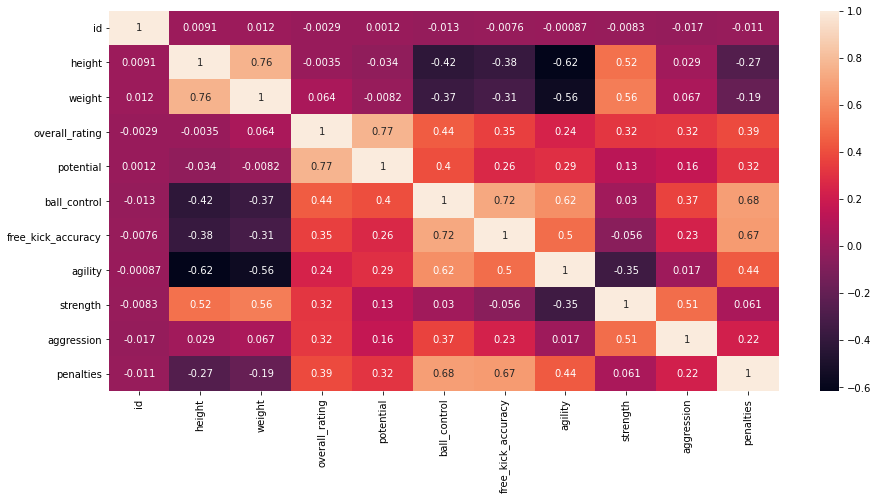

In [21]:
#setting the figure size
plt.figure(figsize = (15,7))
#using a heatmap from the seaborn library to view the correlation between variables
sns.heatmap(players.corr(),annot=True);

> **NOTE:** The heatmap above only shows us the correlation strength between the variables. Correlation does not imply causation.
>
> Therefore, we can not say with certainty that an change in one variable will significantly or insignificantly affect another variable.

##### INSIGHTS
1. There is a strong positive correlation between height and weight (76% relationship)
2. There is a strong positive correlation between potential and overall rating (77% relationship)
3. Agility and ball control have a positive correlation of 0.72
4. Ball control seems to be the variable that has a strong influence on penalty (not with certainty)
5. Agility is decreased as the height and weight of a player increases ( not with certainty)
6. Agression of a player is independent of all the variables displayed above
7. Strength of a player is fairly influenced by the height and weight of the player.

> **QUESTION 4: Top 5 players with the highest agression**

In [22]:
# 1. grouping the dataset according to the various player names
# 2. After grouping, the aggression column was extracted and the sum function applied
# 3. Finally the subseted data was arranged in ascending order 
# 4. The top 5 players is displayed below
top_players1 = players.groupby('player_name')['aggression'].sum().sort_values(ascending=False).head(5)
top_players1

player_name
Danilo      7511.0
Maicon      6052.0
Alex        5962.0
Douglas     5871.0
Fernando    5850.0
Name: aggression, dtype: float64

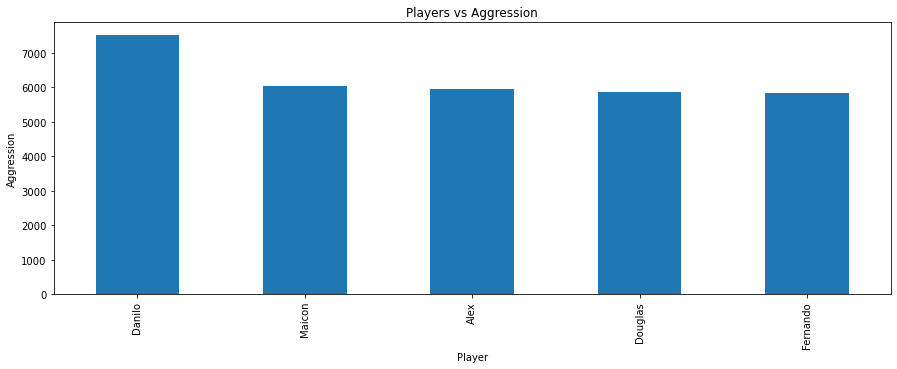

In [23]:
plt.figure(figsize =(15,5)) #setting plot size
top_players1.plot(kind='bar') #making the plot
plt.title('Players vs Aggression') #setting plot title
plt.xlabel('Player') #setting label name for x-axis
plt.ylabel('Aggression'); # setting label name for y-axis

##### INSIGHT
1. Danilo had the highest aggression. He also had the highest number of penalties.
2. The top 5 agressive players also made the list of top 20 players with highest penalties.
3. There could be a possible link between aggression and penalties.

> **QUESTION 5. Players with the highest strength**

In [24]:
#checking the maximum strength level in the dataset
players.strength.max()

96.0

In [25]:
# creating a subset dataframe containing only the players with the maximum strength
top_players2 = players[ players.strength == players.strength.max() ]

#obtaining the names of all the players in the new subseted data
top_players2['player_name'].unique().tolist()

['Christopher Samba',
 'Daniel van Buyten',
 'Didier Drogba',
 'Herold Goulon',
 'John Carew']

##### INSIGHTS
1. John Carew, Herold Goulon, Didier Drogba, Daniel van Buyten, Christopher Samba are the players with the highest strength of 96

> **QUESTION 6: WHICH PLAYERS HAD THE HIGHEST RATING**

In [26]:
players.groupby('player_name')['overall_rating'].sum().sort_values(ascending=False)

player_name
Danilo              7894.0
Alex                7118.0
Douglas             6606.0
Felipe              6452.0
Ricardo             5883.0
                     ...  
Steven De Pauw       100.0
David Hopkirk         98.0
Sven De Volder        98.0
Benjamin Fischer      92.0
Liam Hughes           92.0
Name: overall_rating, Length: 10848, dtype: float64

##### INSIGHTS
- Danilo has once again topped the chart. With an overall rating of 7894

### GENERAL PROPERTIES AND DATA CLEANING ON THE MATCH DATASET

In [27]:
#to view the first 5 rows of the data
matches.head(5)

,id,country_name,league_name,season,date,home_team,away_team,home_team_goal,away_team_goal
0,1,Belgium,Belgium Jupiler League,2008/2009,2008-08-17 00:00:00,KRC Genk,Beerschot AC,1,1
1,2,Belgium,Belgium Jupiler League,2008/2009,2008-08-16 00:00:00,SV Zulte-Waregem,Sporting Lokeren,0,0
2,3,Belgium,Belgium Jupiler League,2008/2009,2008-08-16 00:00:00,KSV Cercle Brugge,RSC Anderlecht,0,3
3,4,Belgium,Belgium Jupiler League,2008/2009,2008-08-17 00:00:00,KAA Gent,RAEC Mons,5,0
4,5,Belgium,Belgium Jupiler League,2008/2009,2008-08-16 00:00:00,FCV Dender EH,Standard de Liège,1,3


> To make this dataset a little cleaner, the date-time stamp in the date column was splitted and the match year and match month was extracted and kept for further analysis. 
>
>The date column was however dropped

In [28]:
#Obtaining the datestamp from the date column (recall the date column has both date and time stamp)
matches['date']=pd.to_datetime(matches['date']).dt.date

#Extracting only the year and month from the datestamp and converting the data type to categorical for analysis
matches['match_year'] = pd.DatetimeIndex(matches['date']).year.astype('category')
matches['match_month'] = pd.DatetimeIndex(matches['date']).month.astype('category')

#dropping the date column
matches.drop('date', inplace =True, axis=1)

#viewing the final result
matches.head(5)

,id,country_name,league_name,season,home_team,away_team,home_team_goal,away_team_goal,match_year,match_month
0,1,Belgium,Belgium Jupiler League,2008/2009,KRC Genk,Beerschot AC,1,1,2008,8
1,2,Belgium,Belgium Jupiler League,2008/2009,SV Zulte-Waregem,Sporting Lokeren,0,0,2008,8
2,3,Belgium,Belgium Jupiler League,2008/2009,KSV Cercle Brugge,RSC Anderlecht,0,3,2008,8
3,4,Belgium,Belgium Jupiler League,2008/2009,KAA Gent,RAEC Mons,5,0,2008,8
4,5,Belgium,Belgium Jupiler League,2008/2009,FCV Dender EH,Standard de Liège,1,3,2008,8


> checking to see if there are teams that appear both in the home team and away team at the same time

In [29]:
# checking to see if there are teams that appear both in the home team and away team at the same time
error_match = matches[matches.away_team == matches.home_team]
error_match

,id,country_name,league_name,season,home_team,away_team,home_team_goal,away_team_goal,match_year,match_month
15849,15850,Poland,Poland Ekstraklasa,2008/2009,Polonia Bytom,Polonia Bytom,2,0,2009,4
15944,15945,Poland,Poland Ekstraklasa,2008/2009,Polonia Bytom,Polonia Bytom,2,0,2008,9
16230,16231,Poland,Poland Ekstraklasa,2010/2011,Polonia Bytom,Polonia Bytom,1,1,2010,11
16358,16359,Poland,Poland Ekstraklasa,2010/2011,Polonia Bytom,Polonia Bytom,1,2,2011,5
16454,16455,Poland,Poland Ekstraklasa,2011/2012,Widzew Łódź,Widzew Łódź,0,1,2011,10
16583,16584,Poland,Poland Ekstraklasa,2011/2012,Widzew Łódź,Widzew Łódź,1,1,2012,4


In [30]:
#The above is probably an error as we cant have a team playing against itself in a match hence those columns will be dropped
matches.drop([15849,15944,16230,16358,16454,16583],inplace=True,axis=0)

In [31]:
#checking the general information of the dataset
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25973 entries, 0 to 25978
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id              25973 non-null  int64   
 1   country_name    25973 non-null  object  
 2   league_name     25973 non-null  object  
 3   season          25973 non-null  object  
 4   home_team       25973 non-null  object  
 5   away_team       25973 non-null  object  
 6   home_team_goal  25973 non-null  int64   
 7   away_team_goal  25973 non-null  int64   
 8   match_year      25973 non-null  category
 9   match_month     25973 non-null  category
dtypes: category(2), int64(3), object(5)
memory usage: 1.8+ MB


>  There are 3 data types in this dataset and no missing values

In [32]:
#checking for missing values
matches.isnull().sum()

id                0
country_name      0
league_name       0
season            0
home_team         0
away_team         0
home_team_goal    0
away_team_goal    0
match_year        0
match_month       0
dtype: int64

> There are no missing values

In [33]:
#checking for duplicated rows
matches.duplicated().all()

False

> There are no duplicated rows

In [34]:
#checking the statistical summary of the dataset
matches.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,25973,NaN,NaN,NaN,12989.2,7500.34,1,6494,12987,19486,25979
country_name,25973,11,Spain,3040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
league_name,25973,11,England Premier League,3040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,25973,8,2015/2016,3326,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_team,25973,296,FC Lorient,152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
away_team,25973,296,Motherwell,153,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_team_goal,25973,NaN,NaN,NaN,1.54468,1.29725,0,1,1,2,10
away_team_goal,25973,NaN,NaN,NaN,1.16101,1.14218,0,0,1,2,9
match_year,25973,9,2015,3374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
match_month,25973,12,4,2967,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### OBSERVATIONS
1. There are neither any missing values nor duplicated rows
2. There are a total of 11 recorded countries that participated in the match with England as the top participant.
3. There are also 11 different leagues with Spain LIGA/BBVA occuring the most.
4. There are 8 different seasons recorded in the dataset with 2015/2016 season having the most matches.
5. A total of 296 teams (including the home and away team) participated in the match.
6. The highest goal scored by a home team is 10
7. The highest goal scored by an away team is 9
8. There are 9 unique match years with 2015 having the highest number of matches.
9. The month of April had the highest number of matches played through out the years.

<a id='eda1'></a>
### EXPLORATORY DATA ANALYSIS ON THE MATCH DATA SET

#### QUESTIONS TO BE ANSWERED WITH THE DATASET

> **QUESTION 1: WHAT IS THE YEAR RANGE OF THE MATCHES**

In [35]:
# returns all the years contained in the dataset
matches.match_year.unique().tolist()

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

##### INSIGHT
- The dataset constitute matches played between the years 2008 to 2016

> **QUESTION 2: WHAT YEAR HAD THE MOST MATCHES**

In [36]:
#returns all the years with the number of matches played in that year
match_year = matches.groupby('match_year')['league_name'].count().sort_values(ascending=False)
match_year

match_year
2015    3374
2009    3305
2012    3268
2011    3253
2010    3249
2014    3166
2013    3116
2016    1630
2008    1612
Name: league_name, dtype: int64

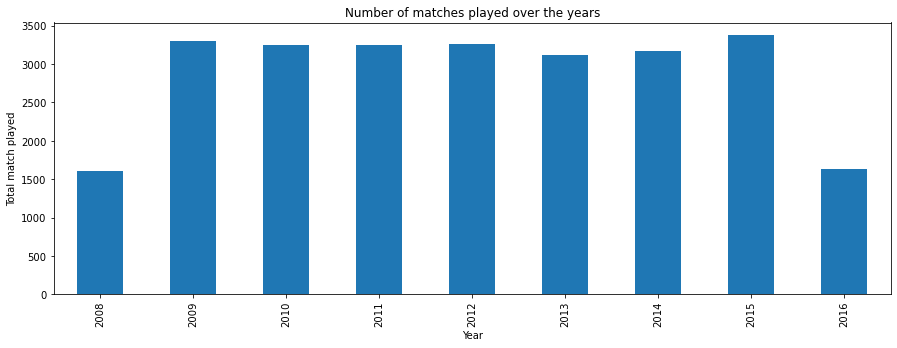

In [37]:
match_year = matches.groupby('match_year')['league_name'].count()
plt.figure(figsize =(15,5)) #setting the figure size
match_year.plot(kind='bar') #making the plot
plt.title('Number of matches played over the years') # setting the plot title
plt.xlabel('Year') #setting the label name of x-axis
plt.ylabel('Total match played'); # setting the label name of y-axis

##### INSIGHT
- In 2015, a total of 3374 matches were held which was accounts the highest number of matches held in a year.
- In 2008, a total of 1612 matches were held accounting for the least number of matches held in a year.

> **QUESTION 3: WHICH COUNTRY PLAYED THE MOST IN THE 2015 SEASON**

In [38]:
#creating a subset data containing the country name and match year
country_season = matches[['country_name','match_year']]

#filtering the dataframe to contain only years 2015
country_season = country_season[country_season['match_year'] == 2015]

#returns the various countries and the number of matches participated in 2015
country_season  = country_season.groupby('country_name').count().sort_values(by='match_year',ascending=False)
#pd.DataFrame(country_season).reset_index(inplace=True)
country_season

,match_year
country_name,
Spain,390
Italy,388
France,381
England,380
Germany,306
Netherlands,306
Portugal,306
Poland,256
Belgium,241


<Figure size 1080x360 with 0 Axes>

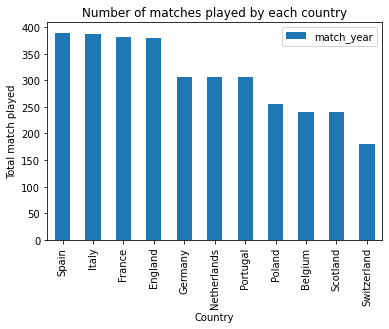

In [39]:
plt.figure(figsize =(15,5)) #setting the figure size
country_season.plot(kind='bar') #making the plot
plt.title('Number of matches played by each country') # setting the plot title
plt.xlabel('Country') #setting the label name of x-axis
plt.ylabel('Total match played'); # setting the label name of y-axis

##### INSIGHT
- Spain played the most during the 2015 season.
- Followed by Italy, France and England.
- Switzerland played the least

> **QUESTION 4: WHAT IS THE MOST PLAYED LEAGUE OVER THE YEARS**

In [40]:
# returns the amount of time a league appeared in the entire dataset
matches.groupby('league_name')['match_year'].count().sort_values(ascending=False)

league_name
Spain LIGA BBVA             3040
France Ligue 1              3040
England Premier League      3040
Italy Serie A               3017
Netherlands Eredivisie      2448
Germany 1. Bundesliga       2448
Portugal Liga ZON Sagres    2052
Poland Ekstraklasa          1914
Scotland Premier League     1824
Belgium Jupiler League      1728
Switzerland Super League    1422
Name: match_year, dtype: int64

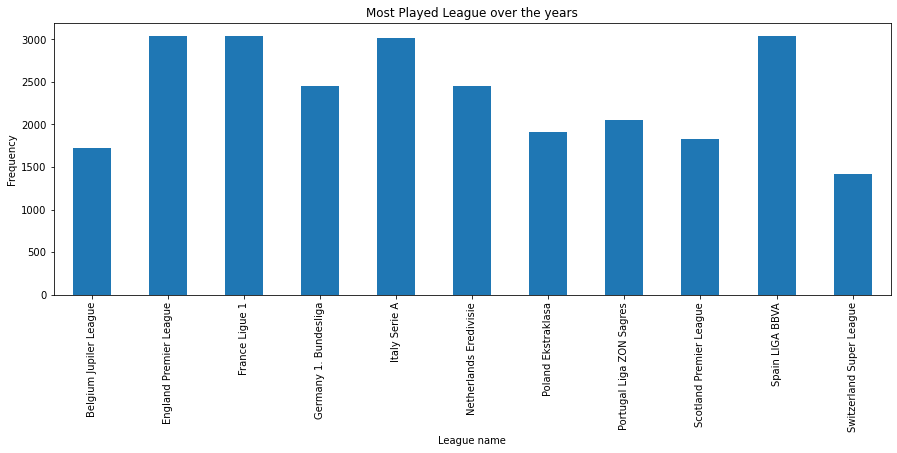

In [41]:
match_year1 = matches.groupby('league_name')['match_year'].count()
plt.figure(figsize =(15,5)) #setting the figure size
match_year1.plot(kind='bar') #making the plot
plt.title('Most Played League over the years') # setting the plot title
plt.xlabel('League name') #setting the label name of x-axis
plt.ylabel('Frequency'); # setting the label name of y-axis

##### INSIGHT
- Spain LIGA BBVA, France Ligue 1, England Premier League were the most played league from 2008 to 2016
- The Switzerland Super League was the least played league

> **QUESTION 5: WHICH HOME TEAM HAS SCORED THE MOST OVER THE YEARS**


In [42]:
# returns the total amount of goals scored by a team over the years
matches.groupby('home_team')['home_team_goal'].sum().sort_values(ascending=False)

home_team
Real Madrid CF          505
FC Barcelona            495
Celtic                  389
FC Bayern Munich        382
PSV                     370
                       ... 
AC Arles-Avignon         14
Trofense                 14
Feirense                 13
Córdoba CF               12
SpVgg Greuther Fürth     10
Name: home_team_goal, Length: 296, dtype: int64

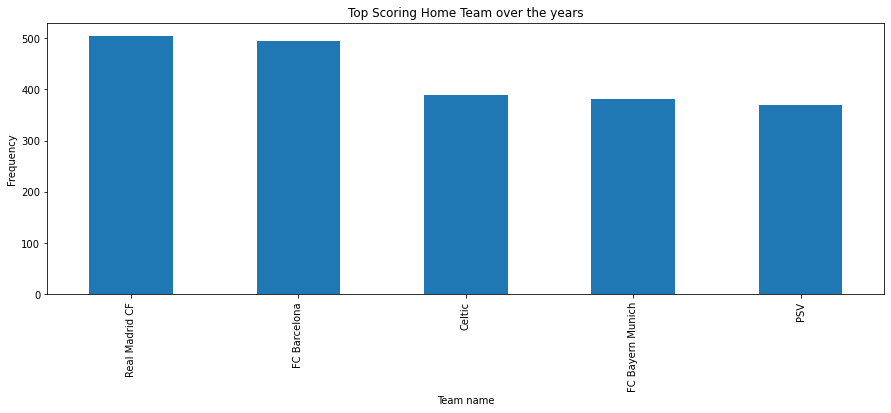

In [43]:
# extracts the top 5 teams
home_matches = matches.groupby('home_team')['home_team_goal'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize =(15,5)) #setting the figure size
home_matches.plot(kind='bar') #making the plot
plt.title('Top Scoring Home Team over the years') # setting the plot title
plt.xlabel('Team name') #setting the label name of x-axis
plt.ylabel('Frequency'); # setting the label name of y-axis


##### INSIGHTS
- Real Madrid CF, FC Barcelona, Celtic, FC Bayern Munich and PSV are the top scoring team in the home team.  
- AC Arles-Avignon, Trofense, Feirense, Córdoba CF and SpVgg Greuther Fürth are the least scoring team in the away team.

> **QUESTION 6: WHICH AWAY TEAM HAS SCORED THE MOST OVER THE YEARS**


In [44]:
# returns the total amount of goals scored by a team over the years
matches.groupby('away_team')['away_team_goal'].sum().sort_values(ascending=False)

away_team
FC Barcelona        354
Real Madrid CF      338
Celtic              306
Ajax                287
PSV                 282
                   ... 
FC Dordrecht          9
Uniao da Madeira      8
Reggio Calabria       7
AC Arles-Avignon      7
FC Metz               5
Name: away_team_goal, Length: 296, dtype: int64

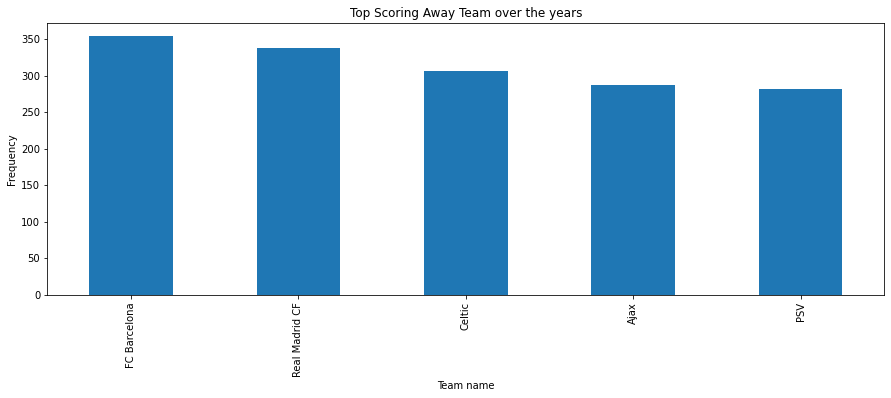

In [45]:
# extracts the top 5 away teams
away_matches = matches.groupby('away_team')['away_team_goal'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize =(15,5)) #setting the figure size
away_matches.plot(kind='bar') #making the plot
plt.title('Top Scoring Away Team over the years') # setting the plot title
plt.xlabel('Team name') #setting the label name of x-axis
plt.ylabel('Frequency'); # setting the label name of y-axis

##### INSIGHTS
- FC Barcelona, Real Madrid CF, Celtic, Ajax and PSV are the top scoring team in the away team
- FC Dordrecht, Uniao da Madeira, Reggio Calabria, AC Arles-Avignon and FC Metz are the least scoring team in the away team

> **QUESTION 7: WHICH HOME TEAM HAD THE HIGHEST GOALS IN THE England Premier League IN 2015**

In [46]:
# creating a subset of the original data
england_league = matches[['league_name','match_year','home_team','home_team_goal']] 

# filtering the data to contain only 2015 observations
england_league = england_league[england_league['match_year'] == 2015] 

# filtering the data to contain only the english premier league
england_league = england_league[england_league['league_name']=='England Premier League'] 

#returns the various home teams and their goals in 2015
england_league.groupby('home_team')['home_team_goal'].sum().sort_values(ascending=False)

home_team
Manchester City         56
Arsenal                 38
Tottenham Hotspur       38
Everton                 33
Leicester City          32
Southampton             32
Stoke City              31
Chelsea                 29
Manchester United       29
Liverpool               28
Newcastle United        27
West Ham United         24
West Bromwich Albion    23
Crystal Palace          23
Swansea City            21
Aston Villa             17
Sunderland              15
Norwich City            11
Hull City               11
Watford                 10
Bournemouth             10
Burnley                  7
Queens Park Rangers      6
Name: home_team_goal, dtype: int64

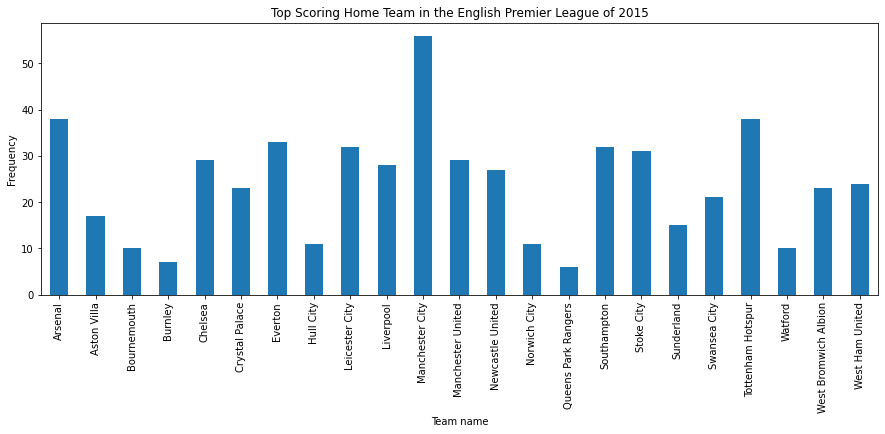

In [47]:
eng_league =england_league.groupby('home_team')['home_team_goal'].sum()#.sort_values(ascending=False)

plt.figure(figsize =(15,5)) #setting the figure size
eng_league.plot(kind='bar') #making the plot
plt.title('Top Scoring Home Team in the English Premier League of 2015') # setting the plot title
plt.xlabel('Team name') #setting the label name of x-axis
plt.ylabel('Frequency'); # setting the label name of y-axis

##### INSIGHTS
- Manchester City was the highest goal scorer in the English Premier League in 2015

> **QUESTION 8: IN WHAT MONTH DO WE HAVE LESS MATCHES BEING PLAYED**

In [48]:
# groups the dataset according to the months and counts the total years in each month
matches.groupby('match_month')['match_year'].count().sort_values(ascending=True)

match_month
6       23
7      218
1     2183
5     2244
8     2276
12    2524
9     2574
10    2607
11    2738
3     2785
2     2834
4     2967
Name: match_year, dtype: int64

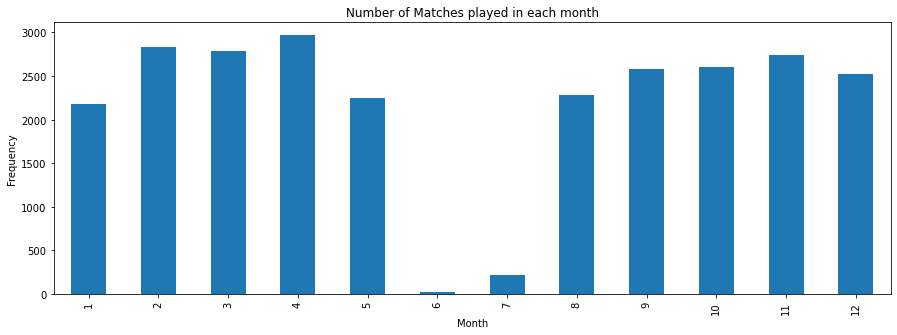

In [49]:
match_month = matches.groupby('match_month')['match_year'].count()

plt.figure(figsize =(15,5)) #setting the figure size
match_month.plot(kind='bar') #making the plot
plt.title('Number of Matches played in each month') # setting the plot title
plt.xlabel('Month') #setting the label name of x-axis
plt.ylabel('Frequency'); # setting the label name of y-axis

##### INSIGHTS
- In the months of June and July, a whole lot of matches were not held
- In the month of April, over 2900 matches were held.

<a id='conclusions'></a>
## Conclusions

> **After careful analysis of the soccer dataset,the following conclusions and findings were drawn**
>
> 1. Player Danilo seems to be topping the chart in most of the player attributes that were analyzed. Howere, a deeper analyis on why this is so can be carried out. It could be that there are more than one persons with the name Danilo hence why Danilo is topping the chart. A further and careful analysis is advised.
>
>
> 2. There is not a whole lot of players born in the following years; 1970, 1969, 1999, 1968, 1967  
>
>
> 3. There seems to be a correlation between some of the player attributes such as agility and ball control, weight and height, and more. However a correlation does not imply causation. 
>
>
> 4. The dataset contains matches played within the years 2008 to 2016. 2015 had the highest number of matches.
>
>
> 5. Countries like Spain, Italy, France and England participated a lot in matches over the years. Also, leagues like Spain LIGA BBVA, France Ligue 1, England Premier League were the most played league.
>
>
> 6. Teams like Real Madrid CF, FC Barcelona, Celtic performed topped the ranks as the highest goal scoring teams both as an away team and a home team.
>
>
> 7. In the England Premier League in 2015, teams like Manchester City, Arsenal and Tottenham Hotspur were the highest goal scoring team.
>
>
> 8. Months like June and July do not have a whole lot of matches unlike April when a lot of matches were held.